In [1]:
import random
import statistics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

random.seed(2025)  

def simulate_known_initial_state(verbose=False, n=3):
    """Simulates the protocol with a known initial state (light off)"""
    iterations = 0
    leader_counter = 0
    light_is_on = False  # KNOWN initial state: off
    prisoners_list = [f'p{i}' for i in range(n)]  # List of prisoners from p0 to p(n-1)
    follower_states = {prisoners_list[i]: False for i in range(1, n)}  # Only followers (excludes p0)
    done = False
    leader_can_declare = False
    
    while not done:
        chosen_prisoner = random.choice(prisoners_list)
        
        if chosen_prisoner == 'p0':  # Leader
            if leader_can_declare:
                done = True
            elif light_is_on:
                light_is_on = False
                leader_counter += 1
                if leader_counter == n - 1:
                    leader_can_declare = True
        
        elif chosen_prisoner in follower_states:  # Followers
            if not follower_states[chosen_prisoner] and not light_is_on:
                light_is_on = True
                follower_states[chosen_prisoner] = True
        
        iterations += 1
    
    return iterations

def simulate_unknown_initial_state(verbose=False, n=3):
    """Simulates the protocol with an unknown initial state"""
    iterations = 0
    leader_counter = 0
    light_is_on = random.choice([True, False])  # UNKNOWN initial state
    prisoners_list = [f'p{i}' for i in range(n)]  # List of prisoners from p0 to p(n-1)
    follower_states = {prisoners_list[i]: 0 for i in range(1, n)}  # Only followers
    done = False
    leader_can_declare = False
    VICTORY_THRESHOLD = 2 * (n - 1)  # 2 * (number_of_followers)
    
    while not done:
        chosen_prisoner = random.choice(prisoners_list)
        
        if chosen_prisoner == 'p0':  # Leader
            if leader_can_declare:
                done = True
            elif light_is_on:
                light_is_on = False
                leader_counter += 1
                if leader_counter == VICTORY_THRESHOLD:
                    leader_can_declare = True
        
        elif chosen_prisoner in follower_states:  # Followers
            if follower_states[chosen_prisoner] < 2 and not light_is_on:
                light_is_on = True
                follower_states[chosen_prisoner] += 1
        
        iterations += 1
    
    return iterations

def run_simulations(num_simulations=1000, n=3):
    """Runs the simulations and collects statistics"""
    print(f"Running {num_simulations} simulations for each protocol...\n")
    
    # Results for known initial state
    known_results = []
    for i in range(num_simulations):
        if (i + 1) % 100 == 0:
            print(f"Progress (known state): {i + 1}/{num_simulations}", end='\r')
        known_results.append(simulate_known_initial_state(n=n))
    
    print()  # New line after progress
    
    # Results for unknown initial state
    unknown_results = []
    for i in range(num_simulations):
        if (i + 1) % 100 == 0:
            print(f"Progress (unknown state): {i + 1}/{num_simulations}", end='\r')
        unknown_results.append(simulate_unknown_initial_state(n=n))
    
    print("\n")
    return known_results, unknown_results

def calculate_statistics(results, name):
    """Calculates and prints statistics for a set of results"""
    print(f"=== Statistics for: {name} ===")
    print(f"Mean iterations: {statistics.mean(results):.2f}")
    print(f"Median iterations: {statistics.median(results):.2f}")
    print(f"Standard deviation: {statistics.stdev(results):.2f}")
    print(f"Minimum iterations: {min(results)}")
    print(f"Maximum iterations: {max(results)}")
    print(f"25th Percentile: {np.percentile(results, 25):.2f}")
    print(f"75th Percentile: {np.percentile(results, 75):.2f}")
    print(f"95th Percentile: {np.percentile(results, 95):.2f}")
    print()

def plot_comparison(known_results, unknown_results, n):
    """Creates enhanced comparison plots using seaborn styling"""
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), dpi=300)
    
    # Histogram
    sns.histplot(unknown_results, ax=ax1, bins=30, kde=False, stat="density", color='#ffad51', label='Unknown initial state', alpha=0.7)
    sns.histplot(known_results, ax=ax1, bins=30, kde=False, stat="density", color='skyblue', label='Known initial state', alpha=0.7)
    ax1.set_xlabel('Number of Iterations', fontsize=17)
    ax1.set_ylabel('Density', fontsize=17)
    ax1.set_title(f'Iteration Distribution', fontsize=18, weight='bold')
    ax1.legend(fontsize=14)
    
    # Box plot
    data_to_plot = [known_results, unknown_results]
    sns.boxplot(data=data_to_plot, ax=ax2, palette=['skyblue', '#ffad51'])
    ax2.set_xticks([0, 1])
    ax2.set_xticklabels(['Known State', 'Unknown State'], fontsize=20)
    ax2.set_ylabel('Number of Iterations', fontsize=20)
    ax2.set_title(f'Iteration Spread', fontsize=18, weight='bold')
    
    plt.suptitle(f'Simulation Analysis for {n} Prisoners', fontsize=25, weight='bold')
    #plt.tight_layout(rect=[0, 0.03, 0.8, 0.75])
    plt.show()

def main(n=3, num_simulations=1000):
    """Main function
    
    Args:
        n: total number of prisoners (default: 3)
        num_simulations: number of simulations to run (default: 1000)
    """
    print("=== PRISONER'S PUZZLE SIMULATION ===\n")
    print("Parameters:")
    print(f"- {n} prisoners (1 leader + {n-1} followers)")
    print(f"- {num_simulations} simulations per protocol")
    print("- Protocol 1: Known initial state (light off)")
    print("- Protocol 2: Unknown initial state\n")
    
    # Run simulations
    known_results, unknown_results = run_simulations(num_simulations, n=n)
    
    # Calculate and show statistics
    calculate_statistics(known_results, "Protocol with KNOWN initial state")
    calculate_statistics(unknown_results, "Protocol with UNKNOWN initial state")
    
    # Direct comparison
    print("=== DIRECT COMPARISON ===")
    mean_known = statistics.mean(known_results)
    mean_unknown = statistics.mean(unknown_results)
    print(f"Average increase in iterations: {mean_unknown - mean_known:.2f} ({((mean_unknown/mean_known - 1) * 100):.1f}%)")
    print(f"Mean ratio: {mean_unknown/mean_known:.2f}x\n")
    
    
    # Create plots
    plot_comparison(known_results, unknown_results, n)
    
    # Additional analysis: probability of finishing within N iterations
    print("\n=== CUMULATIVE PROBABILITIES ===")
    # Adapt thresholds based on the number of prisoners
    max_threshold = int(mean_unknown * 3)  # About 3 times the mean of the unknown case
    thresholds = [int(max_threshold * p) for p in [0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]]
    for threshold in thresholds:
        prob_known = sum(1 for x in known_results if x <= threshold) / len(known_results) * 100
        prob_unknown = sum(1 for x in unknown_results if x <= threshold) / len(unknown_results) * 100
        print(f"Probability of finishing within {threshold} iterations:")
        print(f"  - Known state: {prob_known:.1f}%")
        print(f"  - Unknown state: {prob_unknown:.1f}%")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


=== PRISONER'S PUZZLE SIMULATION ===

Parameters:
- 3 prisoners (1 leader + 2 followers)
- 1000 simulations per protocol
- Protocol 1: Known initial state (light off)
- Protocol 2: Unknown initial state

Running 1000 simulations for each protocol...

Progress (known state): 1000/1000
Progress (unknown state): 1000/1000

=== Statistics for: Protocol with KNOWN initial state ===
Mean iterations: 13.57
Median iterations: 13.00
Standard deviation: 5.04
Minimum iterations: 5
Maximum iterations: 36
25th Percentile: 10.00
75th Percentile: 16.00
95th Percentile: 23.00

=== Statistics for: Protocol with UNKNOWN initial state ===
Mean iterations: 21.68
Median iterations: 21.00
Standard deviation: 6.31
Minimum iterations: 9
Maximum iterations: 46
25th Percentile: 17.00
75th Percentile: 25.00
95th Percentile: 33.00

=== DIRECT COMPARISON ===
Average increase in iterations: 8.10 (59.7%)
Mean ratio: 1.60x



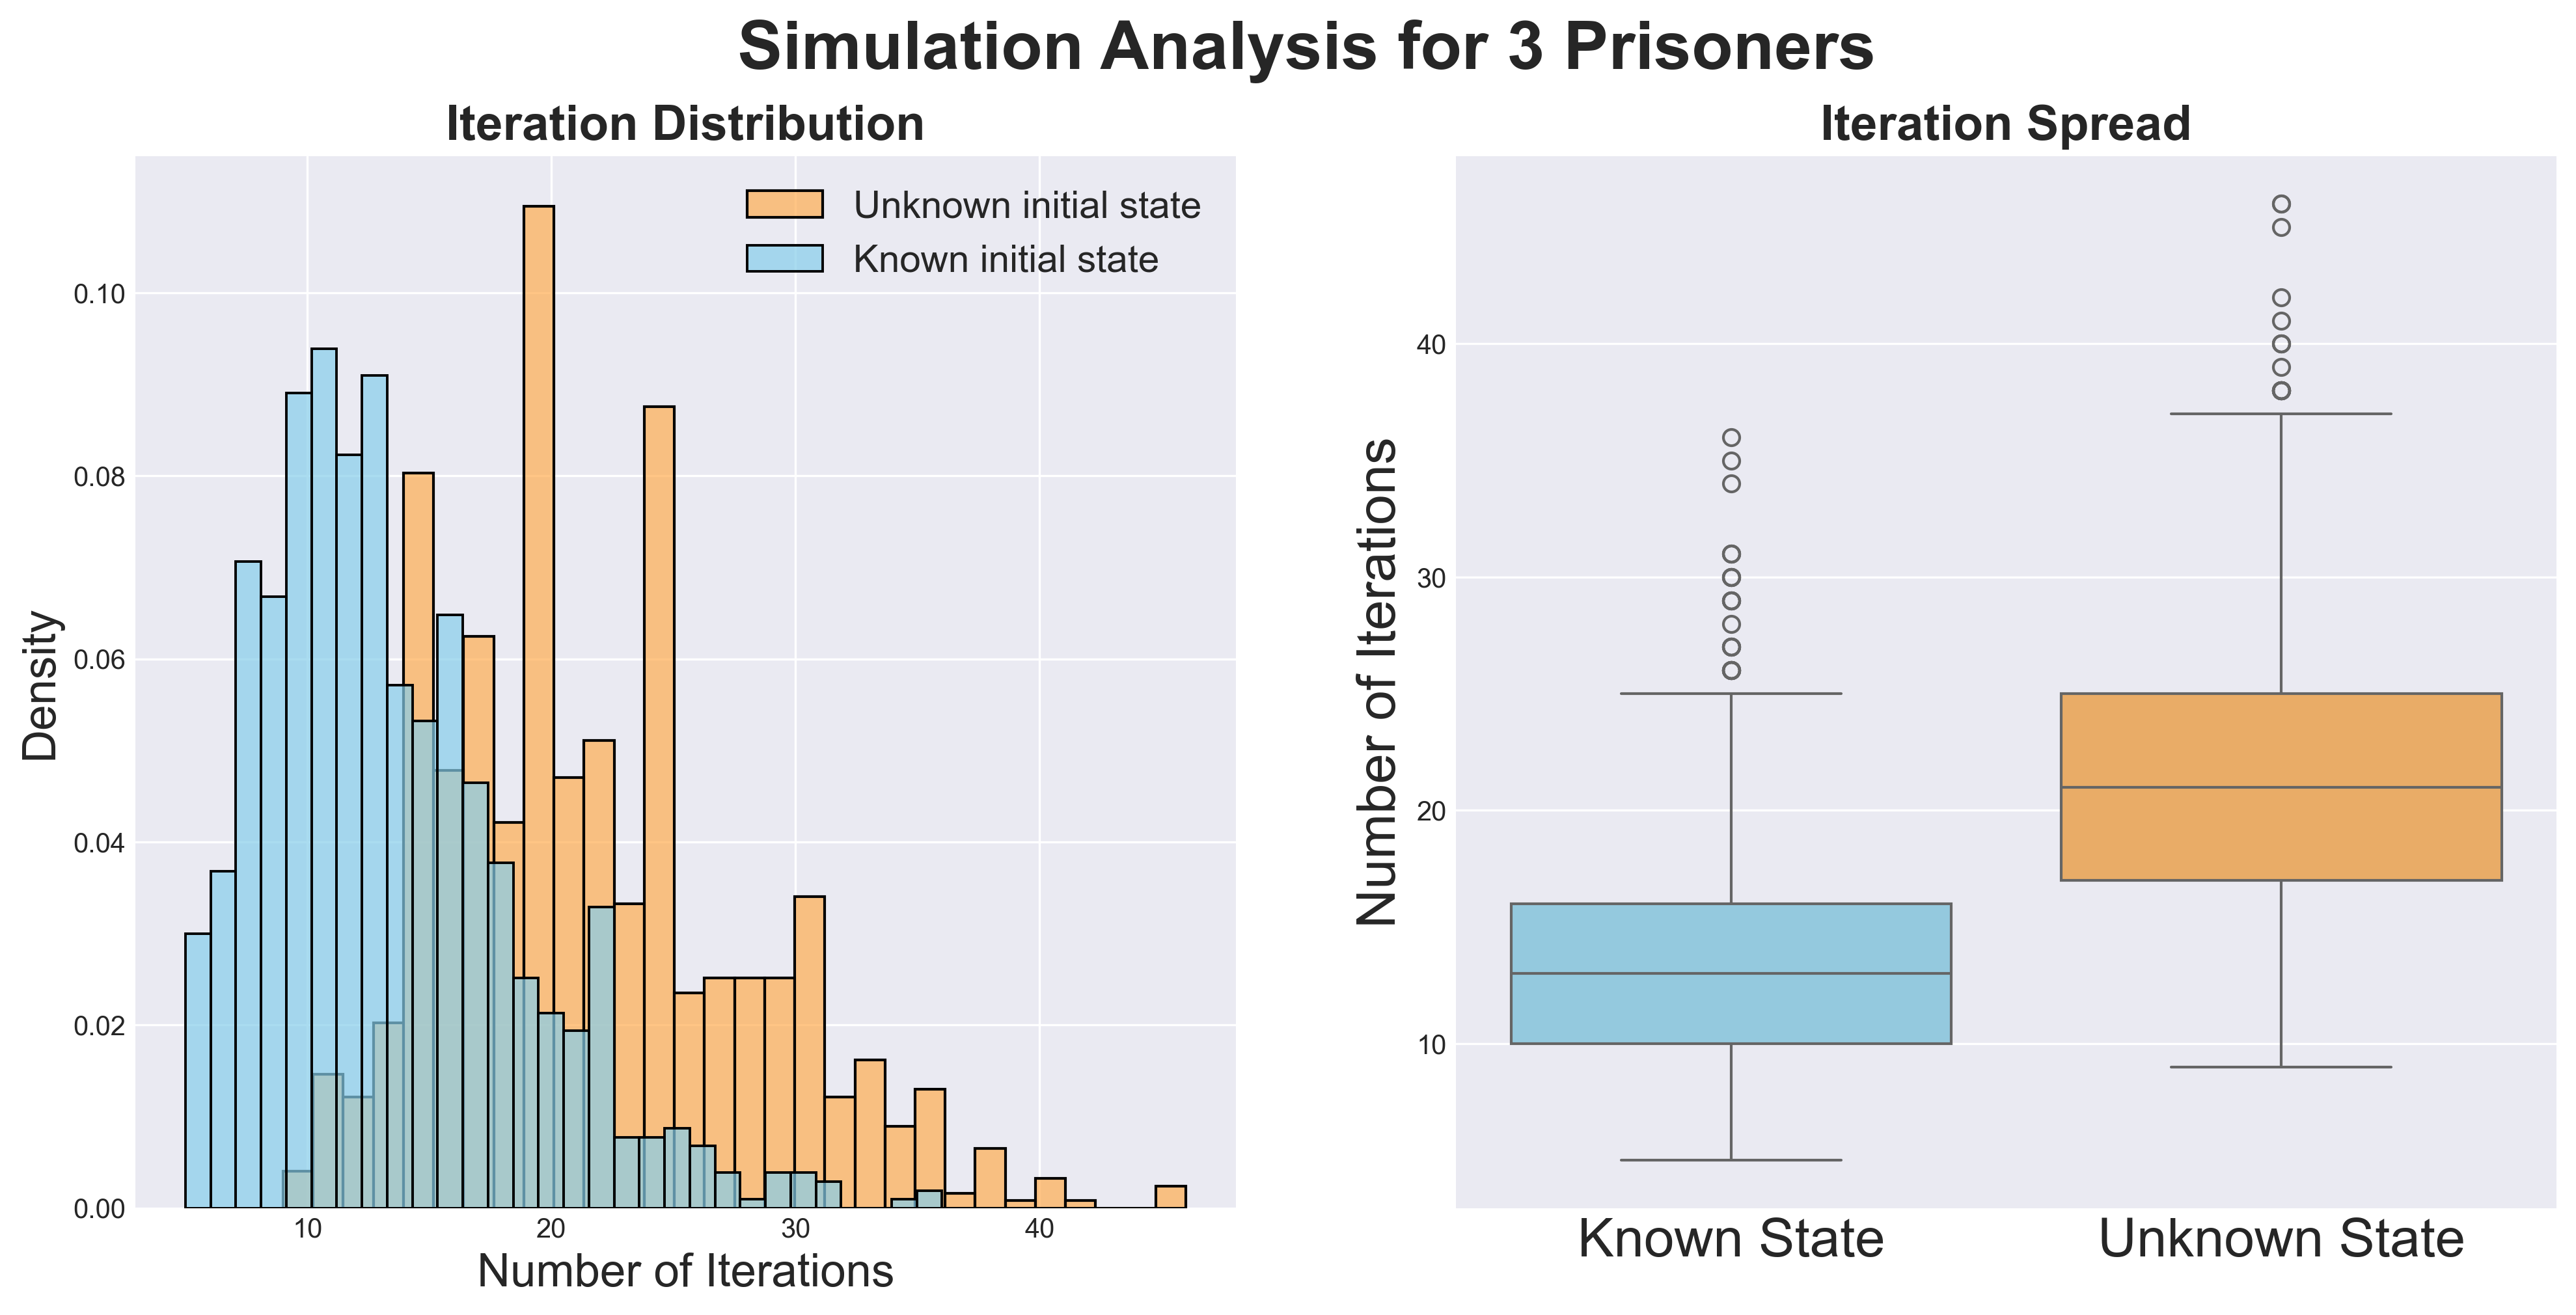


=== CUMULATIVE PROBABILITIES ===
Probability of finishing within 3 iterations:
  - Known state: 0.0%
  - Unknown state: 0.0%
Probability of finishing within 6 iterations:
  - Known state: 3.1%
  - Unknown state: 0.0%
Probability of finishing within 13 iterations:
  - Known state: 57.9%
  - Unknown state: 6.3%
Probability of finishing within 19 iterations:
  - Known state: 87.3%
  - Unknown state: 40.9%
Probability of finishing within 32 iterations:
  - Known state: 99.7%
  - Unknown state: 93.4%
Probability of finishing within 45 iterations:
  - Known state: 100.0%
  - Unknown state: 99.8%
Probability of finishing within 65 iterations:
  - Known state: 100.0%
  - Unknown state: 100.0%


In [2]:

if __name__ == "__main__":
    # Run standard simulation with 3 prisoners
    main(n=3, num_simulations=1000)